# Nicholas Latifi
<img src="https://www.formula1.com/content/fom-website/en/drivers/nicholas-latifi/_jcr_content/image.img.1920.medium.jpg/1646819118069.jpg" width="300">

### Team: Williams

<img src ="https://www.formula1.com/content/fom-website/en/drivers/nicholas-latifi/_jcr_content/helmet.img.png/1646824698284.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

lat_laps <- lap_data %>%
            filter(driverId == 849)

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1045,56
1052,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5911842,98.5307,1.642178


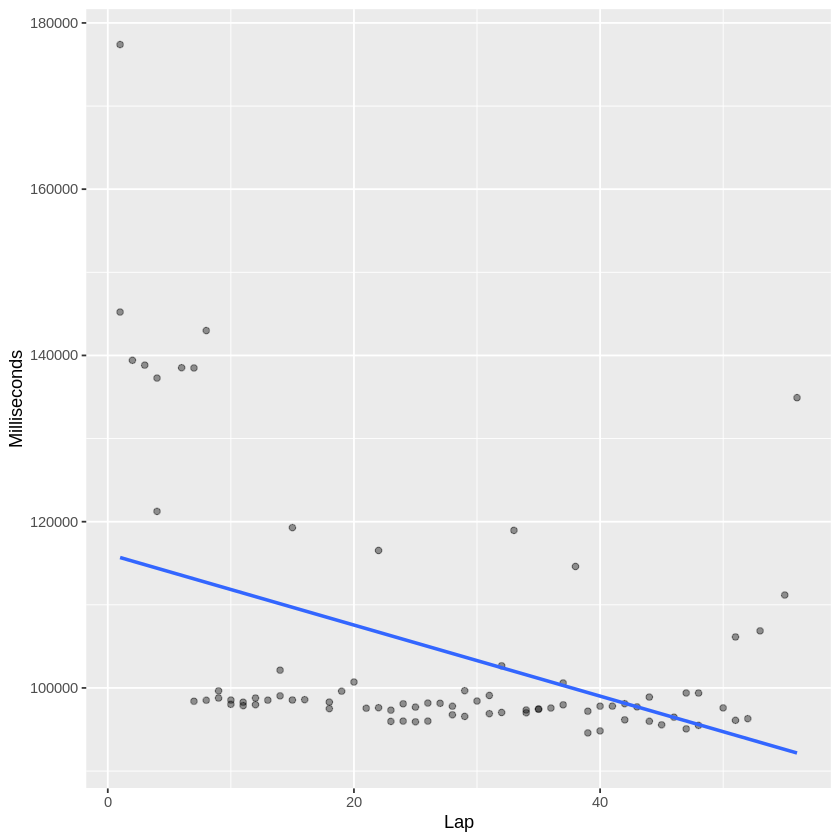

In [4]:
#1. Bahrain 

nl_bahrain <- lat_laps %>%
                filter(raceId %in% bahrain_race_ID) 

nl_bahrain_clean <- nl_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
nl_bahrain_clean
nl_bahrain_clean_ID <- nl_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_bahrain_races <- lat_laps %>%
                    filter(raceId %in% nl_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,64
1054,64


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5636942,93.94903,1.565817


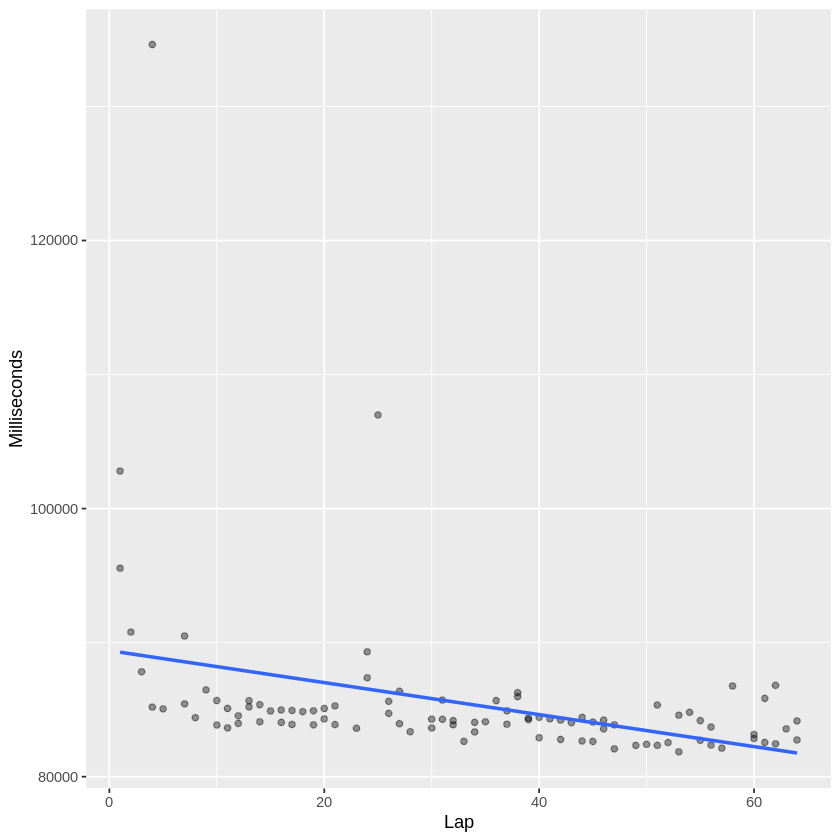

In [5]:
#2. Portimão

nl_Portimão <- lat_laps %>%
                filter(raceId %in% Portimão_race_ID) 

nl_Portimão_clean <- nl_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_Portimão_clean
nl_Portimão_clean_ID <- nl_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_Portimão_races <- lat_laps %>%
                    filter(raceId %in% nl_Portimão_clean_ID) 

formulaone_split <- initial_split(nl_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_Portimão_prediction()

In [6]:
# #3. Australia

# nl_aus <- lat_laps %>%
#                 filter(raceId %in% aus_race_ID) 

# nl_aus_clean <- nl_aus %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# nl_aus_clean
# nl_aus_clean_ID <- nl_aus_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# nl_aus_races <- lat_laps %>%
#                     filter(raceId %in% nl_aus_clean_ID)

# nl_aus_split <- initial_split(nl_aus_races, prop = 0.75, strata = milliseconds)

# formulaone_split <- initial_split(nl_aus_split, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5364406,89.40677,1.490113


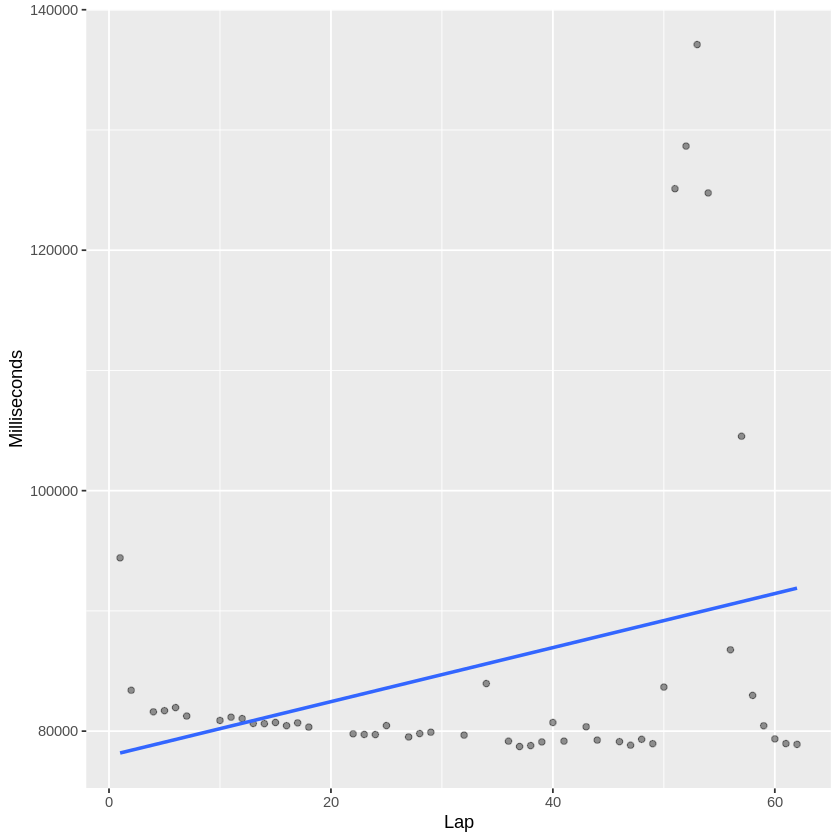

In [7]:
#4. Italy, Imola

nl_imola <- lat_laps %>%
                filter(raceId %in% imola_race_ID) 

nl_imola_clean <- nl_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_imola_clean
nl_imola_clean_ID <- nl_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_imola_races <- lat_laps %>%
                    filter(raceId %in% nl_imola_clean_ID)

formulaone_split <- initial_split(nl_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1067,57
1044,39


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5858515,97.64192,1.627365


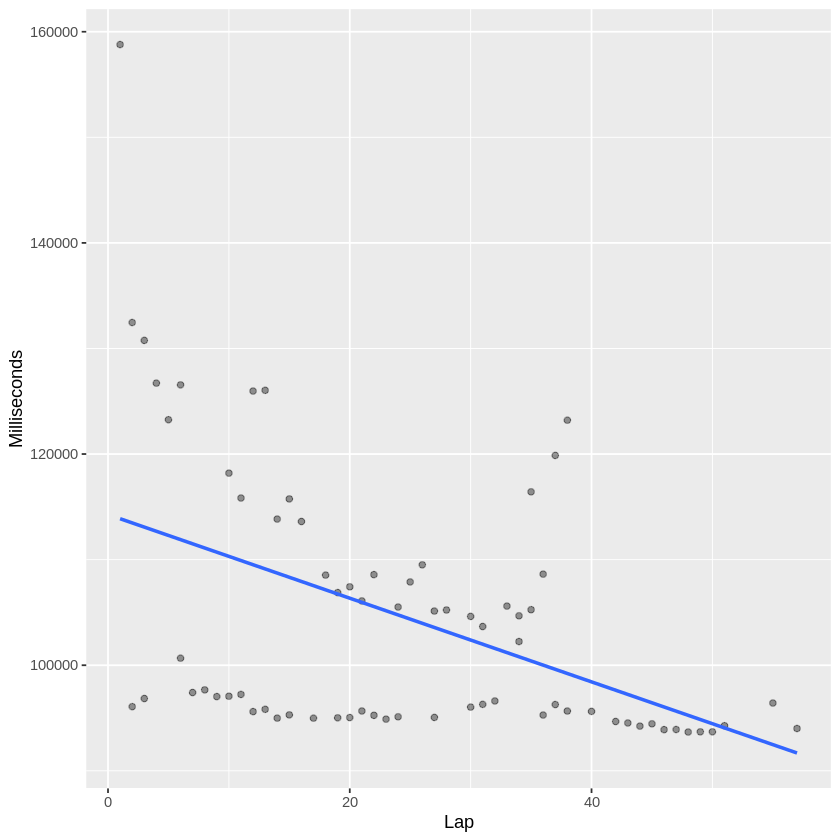

In [8]:
#5. Turkey (Replacing Miami)

nl_turkey <- lat_laps %>%
                filter(raceId %in% turkey_race_ID) 

nl_turkey_clean <- nl_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_turkey_clean
nl_turkey_clean_ID <- nl_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_turkey_races <- lat_laps %>%
                    filter(raceId %in% nl_turkey_clean_ID)

formulaone_split <- initial_split(nl_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1055,65
1036,64


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5727786,95.4631,1.591052


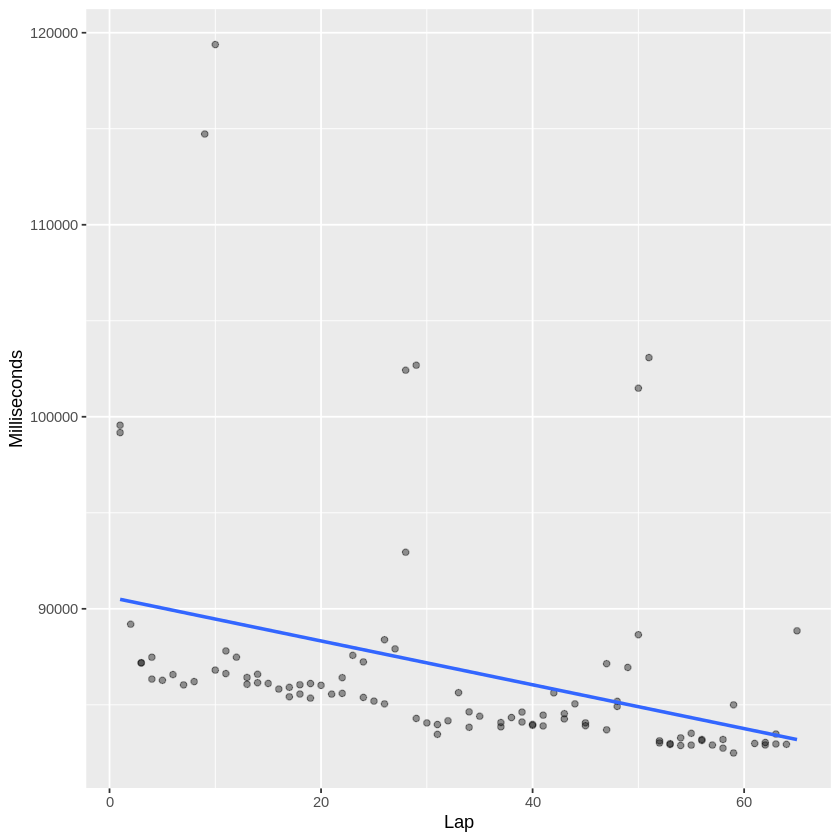

In [9]:
#6. Spain

nl_spain <- lat_laps %>%
                filter(raceId %in% spain_race_ID) 

nl_spain_clean <- nl_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_spain_clean
nl_spain_clean_ID <- nl_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_spain_races <- lat_laps %>%
                    filter(raceId %in% nl_spain_clean_ID)

formulaone_split <- initial_split(nl_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1056,77


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6097690,101.6282,1.693803


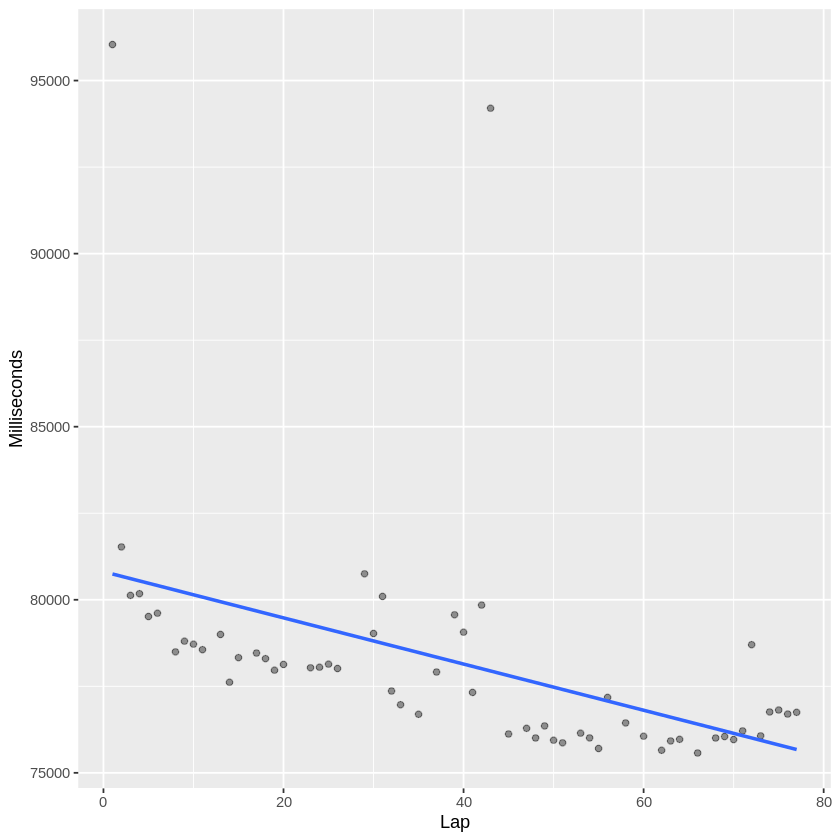

In [10]:
#7. Monaco

nl_monaco <- lat_laps %>%
                filter(raceId %in% monaco_race_ID) 

nl_monaco_clean <- nl_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_monaco_clean
nl_monaco_clean_ID <- nl_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_monaco_races <- lat_laps %>%
                    filter(raceId %in% nl_monaco_clean_ID)

formulaone_split <- initial_split(nl_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5977522,99.62537,1.660423


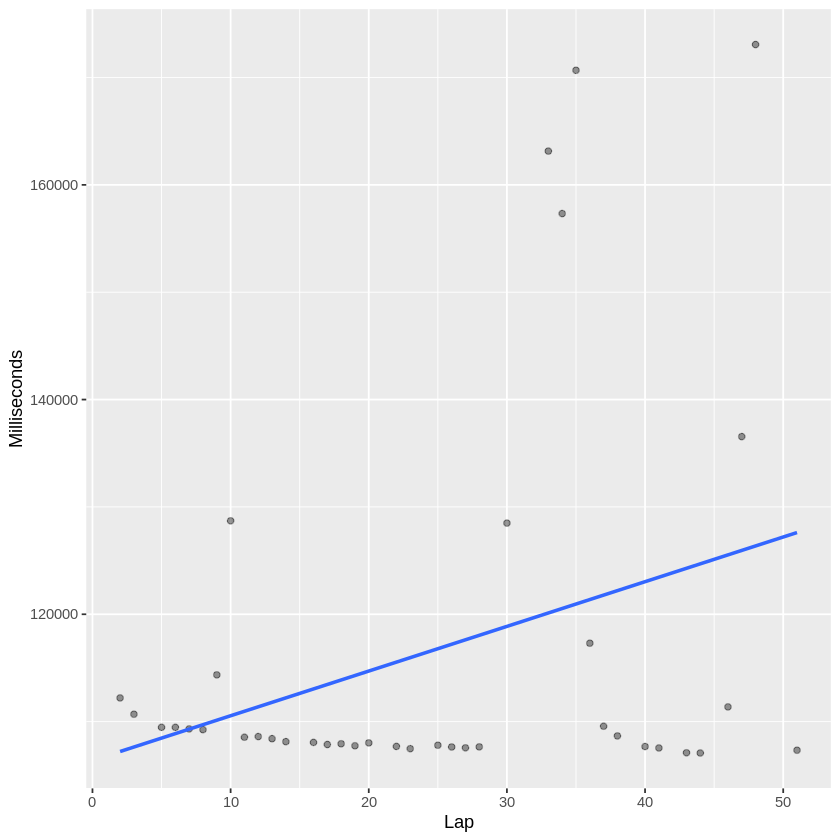

In [11]:
#8. Azerbaijan

nl_azerbaijan <- lat_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

nl_azerbaijan_clean <- nl_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_azerbaijan_clean
nl_azerbaijan_clean_ID <- nl_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_azerbaijan_races <- lat_laps %>%
                    filter(raceId %in% nl_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

In [12]:
# #9. Canada

# nl_canada <- lat_laps %>%
#                 filter(raceId %in% canada_race_ID) 

# nl_canada_clean <- nl_canada %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# nl_canada_clean
# nl_canada_clean_ID <- nl_canada_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# nl_canada_races <- lat_laps %>%
#                     filter(raceId %in% nl_canada_clean_ID)

# formulaone_split <- initial_split(aa_bahrain_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1034,52
1035,51
1061,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5074825,84.58042,1.409674


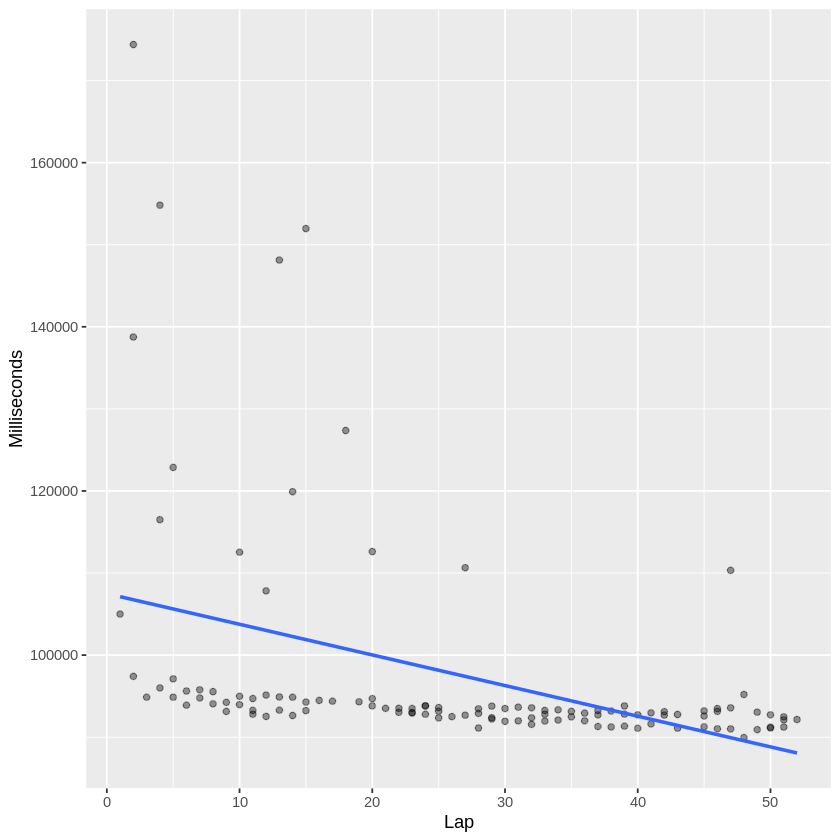

In [13]:
#10. Great Britain

nl_uk <- lat_laps %>%
                filter(raceId %in% uk_race_ID) 

nl_uk_clean <- nl_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_uk_clean
nl_uk_clean_ID <- nl_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_uk_races <- lat_laps %>%
                    filter(raceId %in% nl_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1031,71
1060,70
1032,69
1058,68


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5243892,87.39819,1.456637


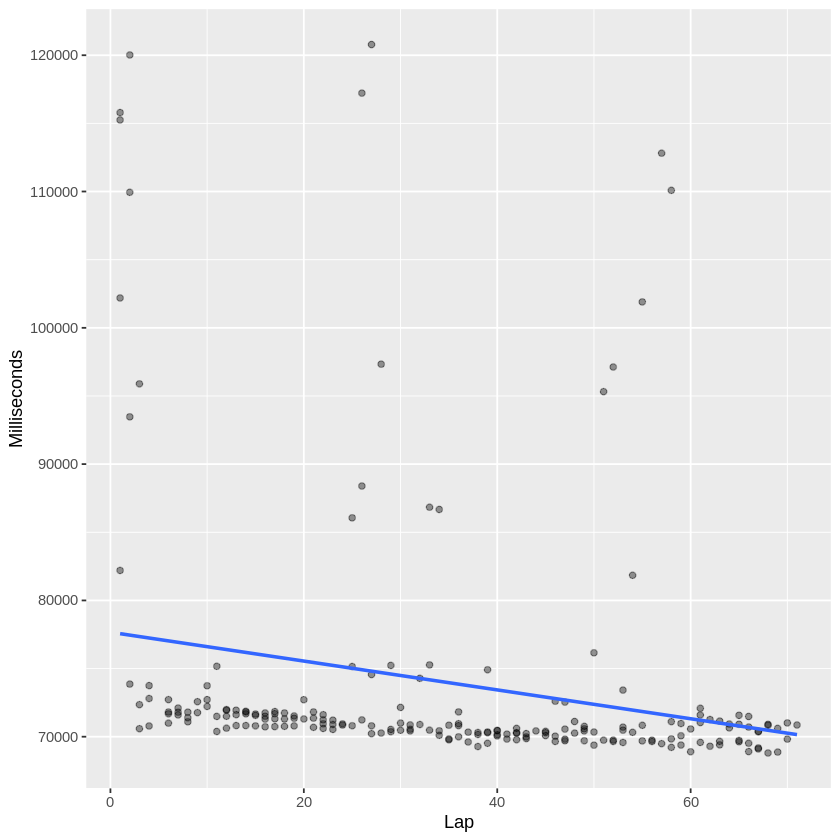

In [14]:
#11. Austria

nl_austria <- lat_laps %>%
                filter(raceId %in% austria_race_ID) 

nl_austria_clean <- nl_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_austria_clean
nl_austria_clean_ID <- nl_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_austria_races <- lat_laps %>%
                    filter(raceId %in% nl_austria_clean_ID)

formulaone_split <- initial_split(nl_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5351902,89.19836,1.486639


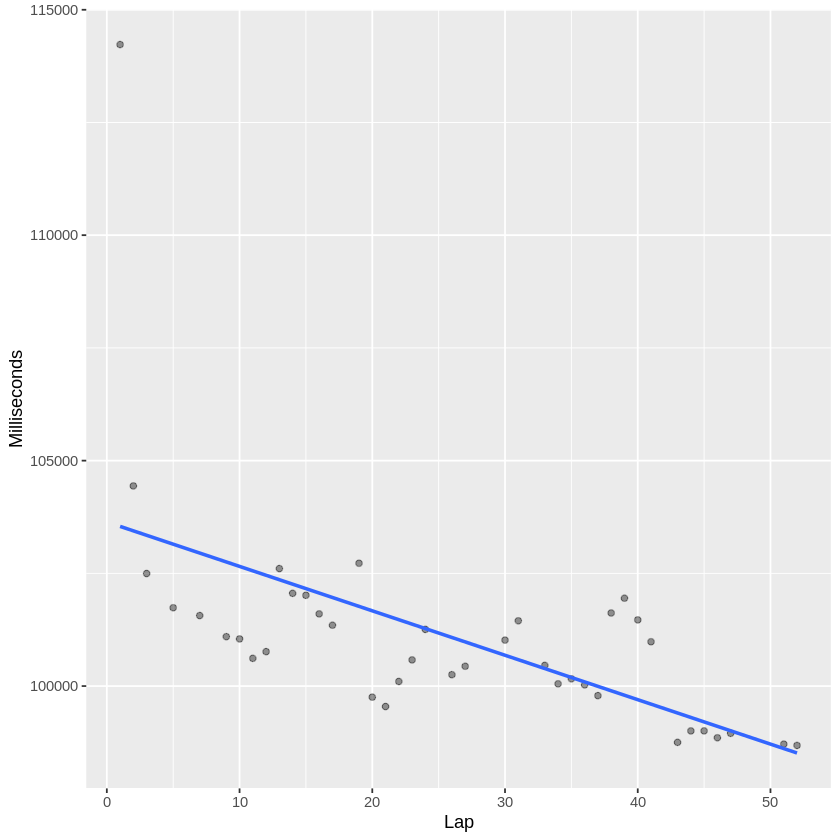

In [15]:
#12. France

nl_france <- lat_laps %>%
                filter(raceId %in% france_race_ID) 

nl_france_clean <- nl_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_france_clean
nl_france_clean_ID <- nl_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_france_races <- lat_laps %>%
                    filter(raceId %in% nl_france_clean_ID)

formulaone_split <- initial_split(nl_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1062,70
1033,65


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6021287,100.3548,1.67258


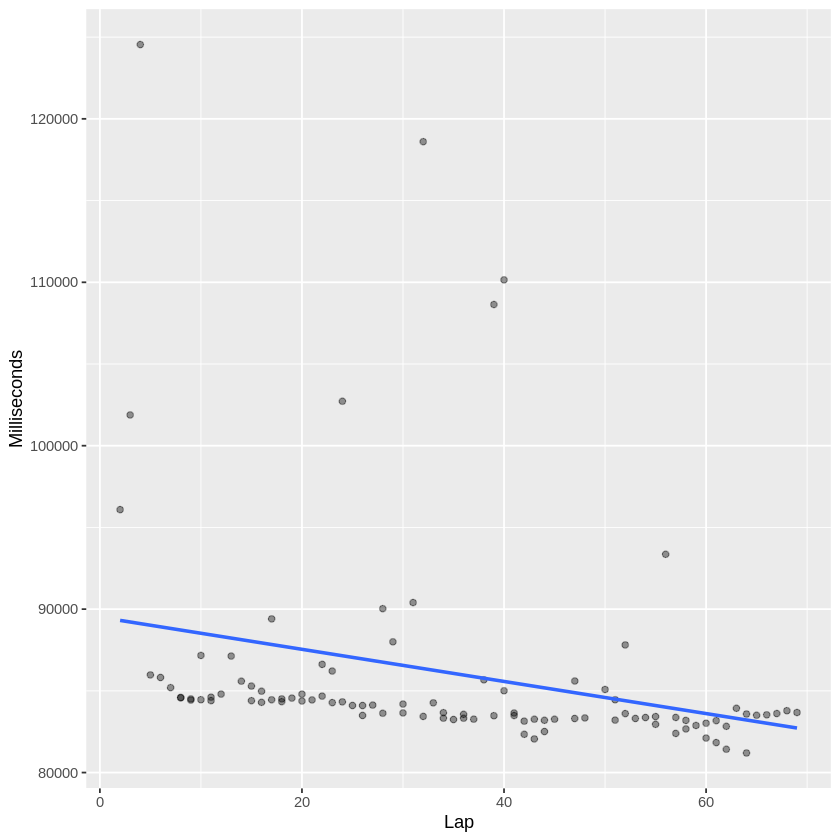

In [16]:
#13. Hungary

nl_hungary <- lat_laps %>%
                filter(raceId %in% hungary_race_ID) 

nl_hungary_clean <- nl_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
nl_hungary_clean
nl_hungary_clean_ID <- nl_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_hungary_races <- lat_laps %>%
                    filter(raceId %in% nl_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(nl_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1037,44
1063,1


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5300281,88.33802,1.4723


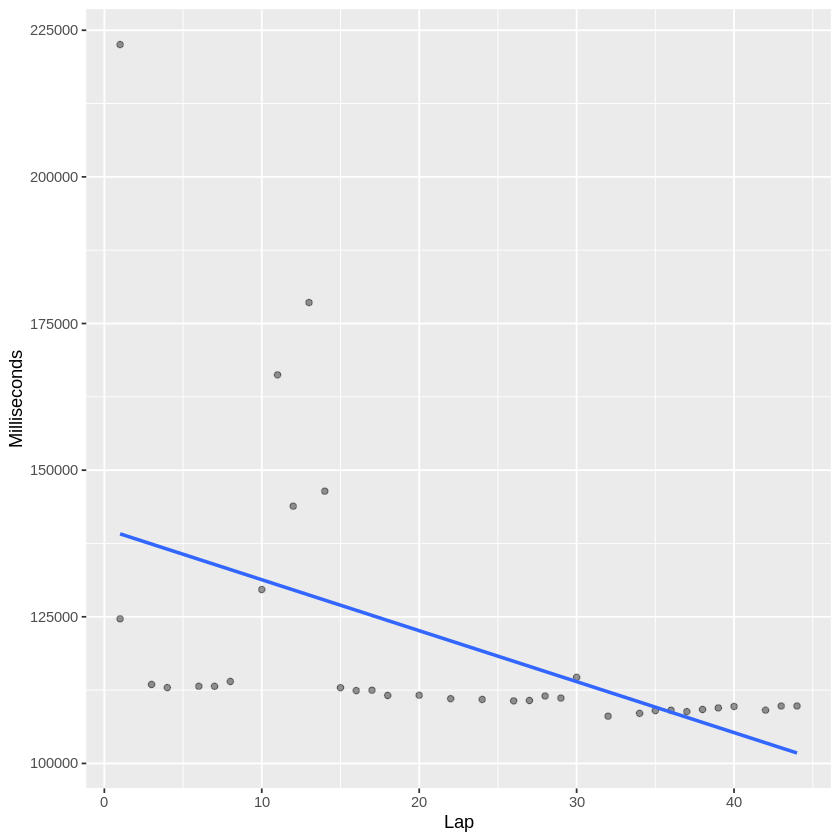

In [17]:
#14. Belgium

nl_belgium <- lat_laps %>%
                filter(raceId %in% belgium_race_ID) 

nl_belgium_clean <- nl_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_belgium_clean
nl_belgium_clean_ID <- nl_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_belgium_races <- lat_laps %>%
                    filter(raceId %in% nl_belgium_clean_ID)

formulaone_split <- initial_split(nl_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5610289,93.50482,1.558414


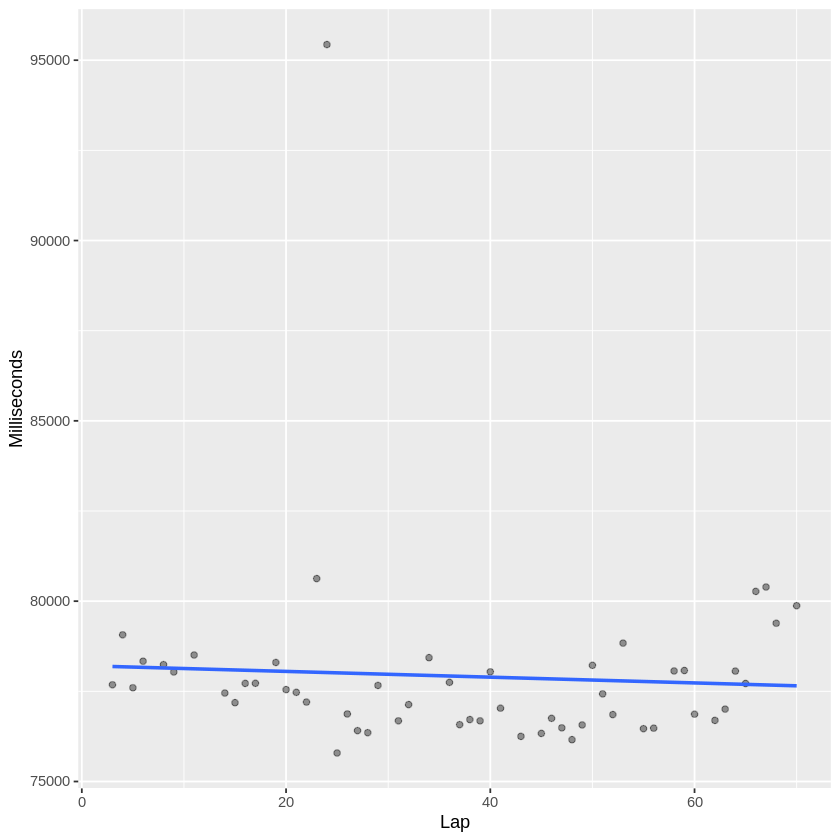

In [18]:
#15. Netherlands

nl_netherlands <- lat_laps %>%
                filter(raceId %in% netherlands_race_ID) 

nl_netherlands_clean <- nl_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_netherlands_clean
nl_netherlands_clean_ID <- nl_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_netherlands_races <- lat_laps %>%
                    filter(raceId %in% nl_netherlands_clean_ID)

formulaone_split <- initial_split(nl_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1038,53
1065,53


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4867902,81.13169,1.352195


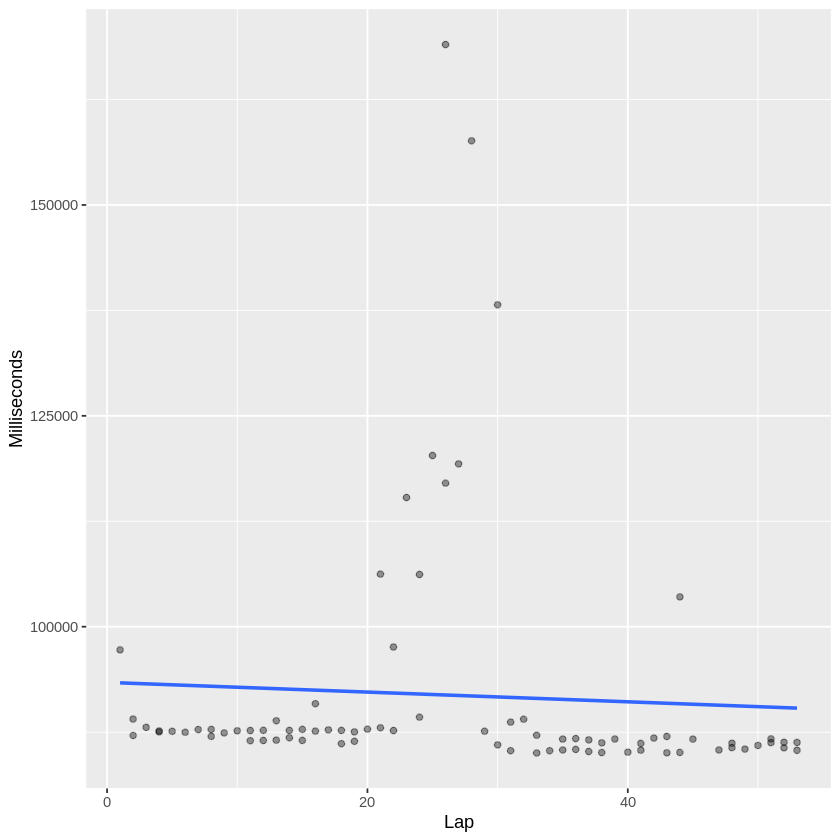

In [19]:
#16. Italy, Monza

nl_monza <- lat_laps %>%
                filter(raceId %in% monza_race_ID) 

nl_monza_clean <- nl_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
nl_monza_clean
nl_monza_clean_ID <- nl_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_monza_races <- lat_laps %>%
                    filter(raceId %in% nl_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

In [20]:
# #17. Singapore

# nl_singapore <- lat_laps %>%
#                 filter(raceId %in% singapore_race_ID) 

# nl_singapore_clean <- nl_singapore %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# nl_singapore_clean
# nl_singapore_clean_ID <- nl_singapore_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# nl_singapore_races <- lat_laps %>%
#                     filter(raceId %in% nl_singapore_clean_ID)

# formulaone_split <- initial_split(nl_singapore_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_singapore_prediction()

In [21]:
# #18. Japan

# nl_japan <- lat_laps %>%
#                 filter(raceId %in% japan_race_ID) 

# nl_japan_clean <- nl_japan %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))
# nl_japan_clean
# nl_japan_clean_ID <- nl_japan_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# nl_japan_races <- lat_laps %>%
#                     filter(raceId %in% nl_japan_clean_ID)

# formulaone_split <- initial_split(nl_japan_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1069,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5833432,97.22386,1.620398


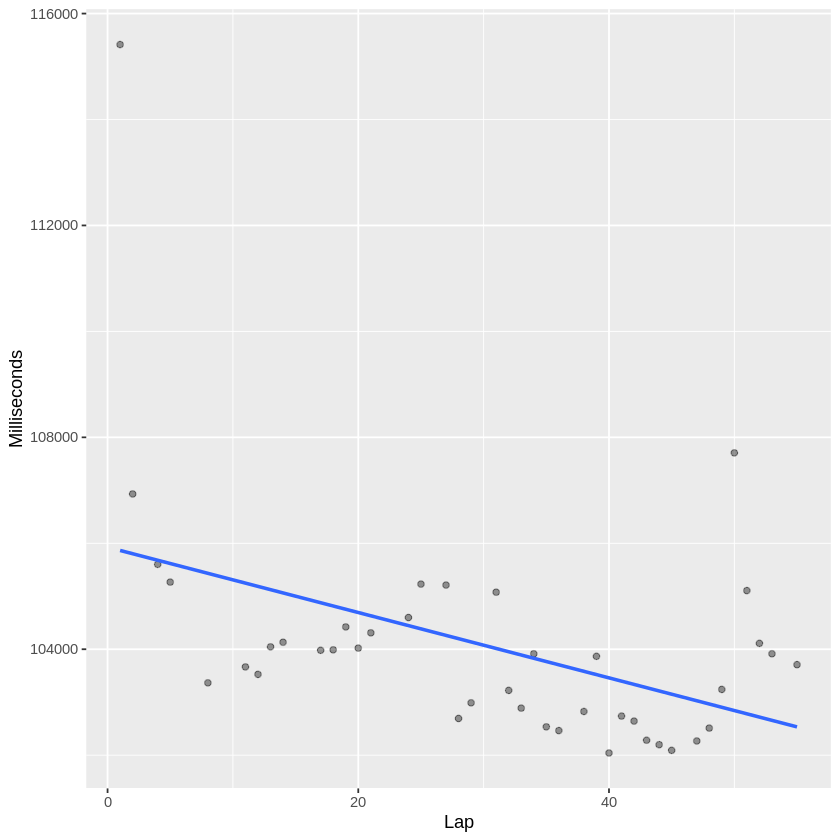

In [22]:
#19 USA, Austin

nl_austin <- lat_laps %>%
                filter(raceId %in% austin_race_ID) 

nl_austin_clean <- nl_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_austin_clean
nl_austin_clean_ID <- nl_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_austin_races <- lat_laps %>%
                    filter(raceId %in% nl_austin_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(nl_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1070,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6076759,101.2793,1.687989


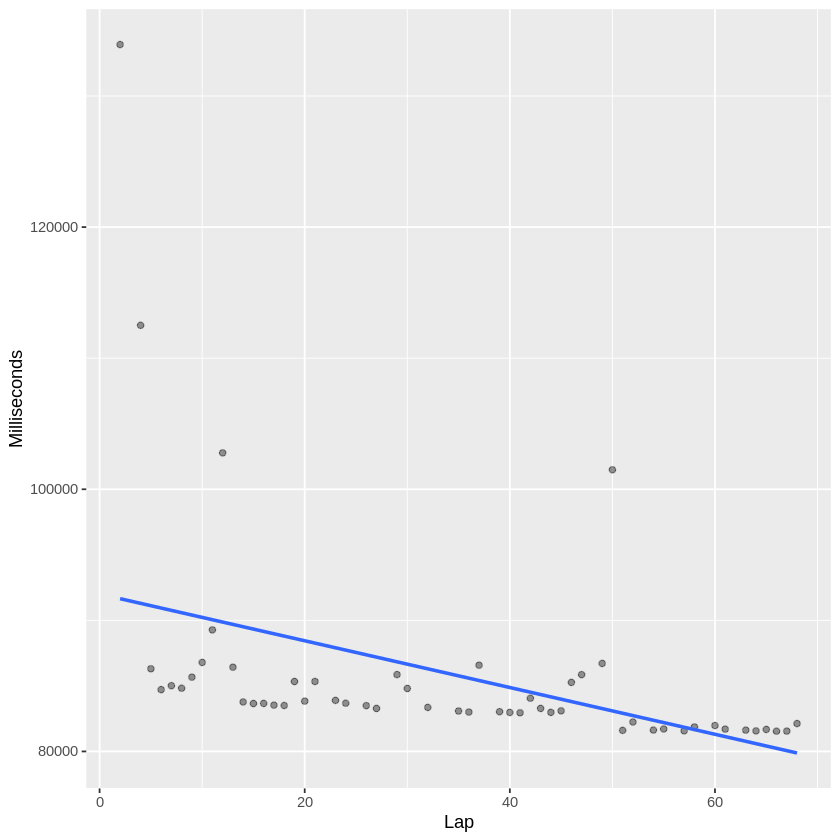

In [23]:
#20. Mexico

nl_mexico <- lat_laps %>%
                filter(raceId %in% mexico_race_ID) 

nl_mexico_clean <- nl_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_mexico_clean
nl_mexico_clean_ID <- nl_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_mexico_races <- lat_laps %>%
                    filter(raceId %in% nl_mexico_clean_ID)

formulaone_split <- initial_split(nl_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1071,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5737202,95.62003,1.593667


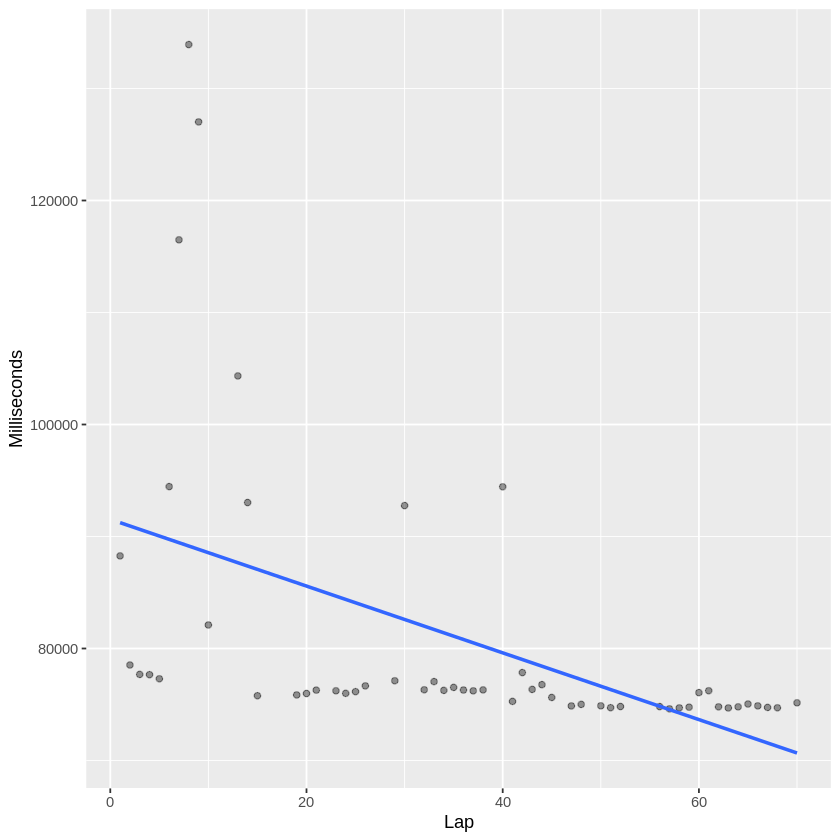

In [24]:
#21. Brazil

nl_brazil <- lat_laps %>%
                filter(raceId %in% brazil_race_ID) 

nl_brazil_clean <- nl_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_brazil_clean
nl_brazil_clean_ID <- nl_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_brazil_races <- lat_laps %>%
                    filter(raceId %in% nl_brazil_clean_ID)

formulaone_split <- initial_split(nl_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1047,54
1073,50


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5810129,96.83548,1.613925


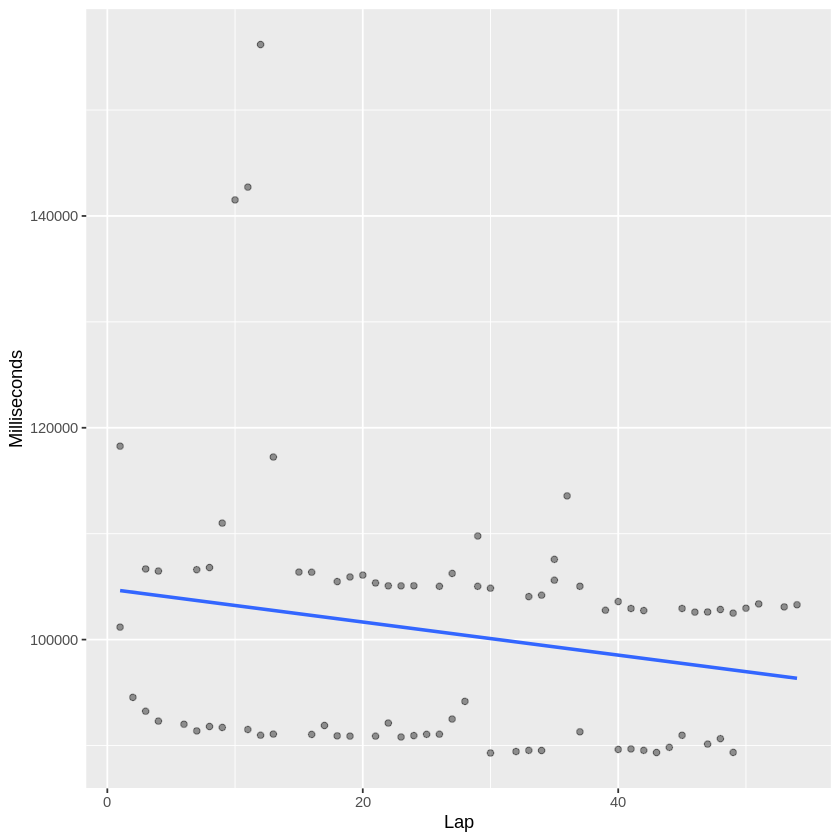

In [25]:
#22. Abu Dhabi

nl_uae <- lat_laps %>%
                filter(raceId %in% uae_race_ID) 

nl_uae_clean <- nl_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_uae_clean
nl_uae_clean_ID <- nl_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_uae_races <- lat_laps %>%
                    filter(raceId %in% nl_uae_clean_ID)

formulaone_split <- initial_split(nl_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()